<a href="https://colab.research.google.com/github/nmycry/Logica-Fuzzy/blob/main/L%C3%B3gicaFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lógica Fuzzy**
> A Lógica Fuzzy (Nebulosa ou Difusa), comumente tratada como uma extensão da lógica booleana, é uma lógica multivalorada capaz de capturar informações vagas, em geral descritas em uma linguagem natural, e convertê-las para um formato numérico.
* Um valor lógico difuso, conhecido por grau de pertinência, é um valor qualquer no intervalo [0, 1].
  * Determina o grau em que um determinado elemento pertence a um conjunto, permitindo uma transição gradual da falsidade para a verdade.
  * Não existe uma base formal para determinar esse valor que é escolhido experimentalmente.

> As implementações da lógica difusa permitem que estados não precisos possam ser tratados por dispositivos de controle.
 * Desse modo, é possível avaliar conceitos não quantificáveis.
 * Casos práticos:
  * Avaliar a temperatura (quente, morno, frio, ...)
  * Sentimento de felicidade (radiante, feliz, apático,
triste, ...)

>O presente notebook colab, escrito por Jhonatan Rotta Santana, Henrique Cavalcante Rodrigues, Willy Brenner Alves Oliveira e Victor Martins Almeida , introduz o desenvolvimento de Sistemas Fuzzy. A codificação foi baseada na biblioteca scikit fuzzy e nos exemplos disponíveis em {1}. Entretanto, o notebook criado por {2} foi de grande ajuda, juntamente com o trabalho acadêmico que usamos para reproduzir o sistema fuzzy {3}.
---
{1} **SCIKIT-FUZZY. Scikit-Fuzzy Overview.** Disponível em: https://pythonhosted.org/scikit-fuzzy/overview.html. Acesso em: 02 outubro 2024.

{2} PISTORI, H. **Exemplo de aplicação de lógica nebulosa** (fuzzy). Disponível em: https://colab.research.google.com/drive/13nqdB-kHLIMUxemuQJfnV1bqrLzM3hPS. Acesso em: 02 outubro 2024.

{3} GABRIEL, Camila Pires Cremasco; GABRIEL FILHO, Luís Roberto Almeida; VIAIS NETO, Daniel dos Santos; BORDIN, Deyver; FLORENTINO, Helenice de Oliveira; CANEPPELE, Fernando de Lima. **Plataforma computacional estruturada com sistemas baseados em regra fuzzy para análise da racionalidade e eficiência da utilização de energia elétrica em empresas de avicultura de postura.** Disponível em: https://dimap.ufrn.br/~cbsf/pub/anais/2012/10000226.pdf. Acesso em: 02 outubro 2024.


In [ ]:
# [1] Instação do pacote skfuzzy
!pip install scikit-fuzzy

# **Sistema Fuzzy**
> Sistemas são desenvolvidos para resolver problemas. Assim, precisamos do problema que pretendemos resolver através de um Sistema Fuzzy, o qual pode ser visto abaixo.

>**Problema:**
Criar um software com base na lógica fuzzy para uma empresa de Avicultura de postura analisar de forma mais racional e inteligente para o uso de energia elétrica, através de comparações mensais bem como comparações entre empresas.

> O projeto do Sistema Fuzzy será organizado conforme as três etapas do raciocínio fuzzy:
1.   Fuzzificação
2.   Inferência Fuzzy
3.   Defuzzificação


# **Fuzzificação**
> Etapa na qual as variáveis linguísticas são definidas de forma subjetiva, bem como as funções membro (funções de pertinência)

> Engloba:
* Análise do Problema
* Definição das Variáveis
* Definição das Funções de pertinência
* Criação das Regiões

> Na definição das funções de pertinência para cada variável, diversos tipos de espaço podem ser gerados:
* Triangular, Trapezoidal, Gaussiana, ...

> Assim, segundo o **problema** apresentado, estamos desenvolvendo um Sistema Fuzzy que modela a situação da empresa com base no Fator de Potência (fp) e Fator de Carga (fc). O fp é um valor entre 0 e 1, o fc também será um valor de 0 e 1 e a situação da empresa vai retornar um valor entre 0 e 300, que irá definir o real situação da empresa (muito ruim, ruim, bom, muito bom).
* Variáveis de Entrada:
  * Fator de Potência:
    * Universo (intervalo de valores): [0, 1]
    * Conjuntos Fuzzy/Funções de Pertinência: muito ruim, ruim médio, bom, muito bom
  * Fator de Carga:
    * Universo (intervalo de valores): [0, 1]
    * Conjuntos Fuzzy/Funções de Pertinência: muito ruim, ruim médio, bom, muito bom
* Variáveis de Saída:
  * Situação da empresa:
    * Universo (intervalo de valores): [0, 300]
    * Conjuntos Fuzzy/Funções de Pertinência: muito ruim, ruim médio, bom, muito bom


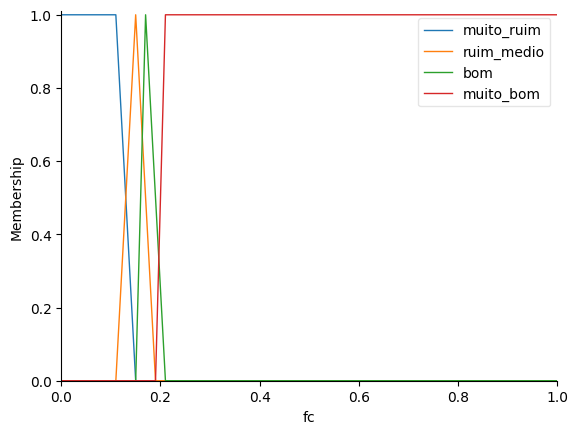

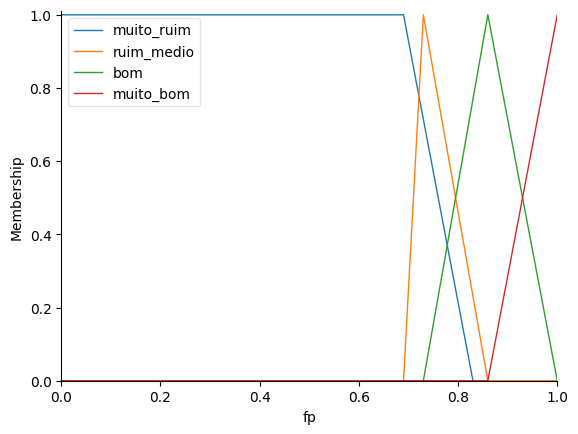

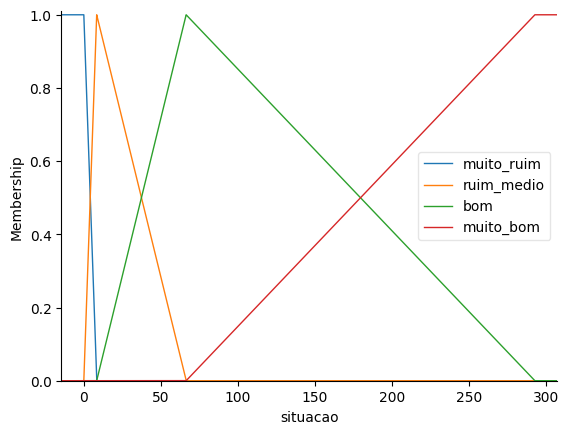

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definir as variáveis fuzzy de entrada
fc = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'fc')  # Fator de carga (fc)
fp = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'fp')  # Fator de potência (fp)

# Definir a variável fuzzy de saída
situacao = ctrl.Consequent(np.arange(-14.63, 307.28, 0.01), 'situacao')  # Situação da empresa

# Definir as funções de pertinência para o fator de carga (fc)
fc['muito_ruim'] = fuzz.trapmf(fc.universe, [0, 0, 0.11, 0.15])
fc['ruim_medio'] = fuzz.trapmf(fc.universe, [0.11, 0.15, 0.15, 0.19])
fc['bom'] = fuzz.trapmf(fc.universe, [0.15, 0.17, 0.17, 0.21])
fc['muito_bom'] = fuzz.trapmf(fc.universe, [0.19, 0.21, 1, 1])

# Definir as funções de pertinência para o fator de potência (fp)
fp['muito_ruim'] = fuzz.trapmf(fp.universe, [0, 0, 0.69, 0.83])
fp['ruim_medio'] = fuzz.trapmf(fp.universe, [0.69, 0.73, 0.73, 0.86])
fp['bom'] = fuzz.trapmf(fp.universe, [0.73, 0.86, 0.86, 1])
fp['muito_bom'] = fuzz.trapmf(fp.universe, [0.86, 1, 1, 1])

# Definir as funções de pertinência para a situação da empresa
situacao['muito_ruim'] = fuzz.trapmf(situacao.universe, [-14.63, -14.63, 0, 8.35])
situacao['ruim_medio'] = fuzz.trapmf(situacao.universe, [0, 8.35, 8.35, 66.41])
situacao['bom'] = fuzz.trapmf(situacao.universe, [8.35, 66.41, 66.41, 292.65])
situacao['muito_bom'] = fuzz.trapmf(situacao.universe, [66.41, 292.65, 307.28, 307.28])

# Visualizar os gráficos das funções de pertinência
fc.view()
fp.view()
situacao.view()



# **Inferência Fuzzy**
> Etapa na qual as proposições (regras) são definidas e depois são examinadas
paralelamente.

> Engloba:
* Definição das proposições
* Análise das regras
* Criação da região resultante

> Definição das Proposições para o Sistema Fuzzy de controle da validade.
* Base de Conhecimento/Regras
  * **SE** o fator de potência (fp) é muito ruim **E** fator de carga (fc) é muito ruim **ENTÃO** a Situação é muito ruim
  * **SE** o fator de potência (fp) é muito ruim **E** fator de carga (fc) é ruim **ENTÃO** a Situação é muito ruim
  * **SE** o fator de potência (fp) é muito ruim **E** fator de carga (fc) é bom **ENTÃO** a Situação é muito ruim
  * **SE** o fator de potência (fp) é muito ruim **E** fator de carga (fc) é muito bom **ENTÃO** a Situação é muito ruim
  * **SE** o fator de potência (fp) é ruim **E** fator de carga (fc) é muito ruim **ENTÃO** a Situação é muito ruim
  * **SE** o fator de potência (fp) é ruim **E** fator de carga (fc) é ruim **ENTÃO** a Situação é ruim
  * **SE** o fator de potência (fp) é ruim **E** fator de carga (fc) é bom **ENTÃO** a Situação é médio
  * **SE** o fator de potência (fp) é ruim **E** fator de carga (fc) é muito bom **ENTÃO** a Situação é médio
  * **SE** o fator de potência (fp) é bom **E** fator de carga (fc) é muito ruim **ENTÃO** a Situação é muito ruim
  * **SE** o fator de potência (fp) é bom **E** fator de carga (fc) é ruim **ENTÃO** a Situação é médio
  * **SE** o fator de potência (fp) é bom **E** fator de carga (fc) é bom **ENTÃO** a Situação é bom
  * **SE** o fator de potência (fp) é bom **E** fator de carga (fc) é muito bom **ENTÃO** a Situação é bom
  * **SE** o fator de potência (fp) é muito bom **E** fator de carga (fc) é muito ruim **ENTÃO** a Situação é muito ruim
  * **SE** o fator de potência (fp) é muito bom **E** fator de carga (fc) é ruim **ENTÃO** a Situação é bom
  * **SE** o fator de potência (fp) é muito bom **E** fator de carga (fc) é bom **ENTÃO** a Situação é muito bom
  * **SE** o fator de potência (fp) é muito bom **E** fator de carga (fc) é muito bom **ENTÃO** a Situação é muito bom
# **Defuzzificação**
> Etapa na qual as regiões resultantes são convertidas em valores para a variável de saída do sistema.

Digite o valor de fp (fator de produção) [0 a 1]: 0.74
Digite o valor de fc (fator de consumo) [0 a 1]: 0.95
A situação da empresa está 112
Pertinência da situação da empresa:
Muito Ruim: 0.00
Ruim Médio: 0.00
Bom: 0.80
Muito Bom: 0.20


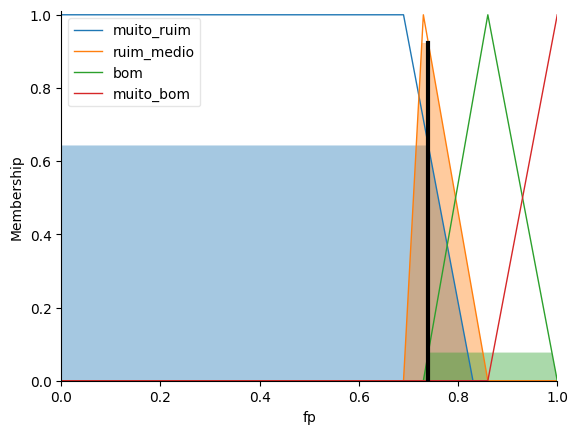

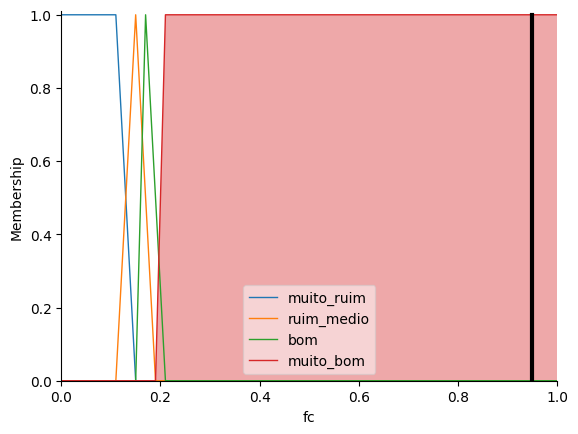

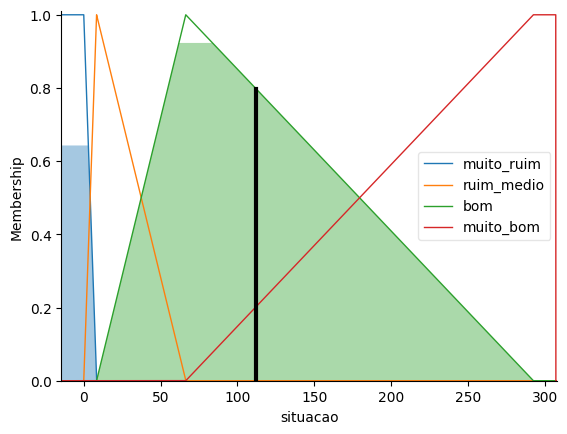

In [ ]:
# [3] Inferência Fuzzy e Defuzzificação

# Base de Conhecimento/Regras
rule1 = ctrl.Rule(fp['muito_ruim'] & fc['muito_ruim'], situacao['muito_ruim'])
rule2 = ctrl.Rule(fp['muito_ruim'] & fc['ruim_medio'], situacao['muito_ruim'])
rule3 = ctrl.Rule(fp['muito_ruim'] & fc['bom'], situacao['muito_ruim'])
rule4 = ctrl.Rule(fp['muito_ruim'] & fc['muito_bom'], situacao['muito_ruim'])

rule5 = ctrl.Rule(fp['ruim_medio'] & fc['muito_ruim'], situacao['muito_ruim'])
rule6 = ctrl.Rule(fp['ruim_medio'] & fc['ruim_medio'], situacao['ruim_medio'])
rule7 = ctrl.Rule(fp['ruim_medio'] & fc['bom'], situacao['bom'])
rule8 = ctrl.Rule(fp['ruim_medio'] & fc['muito_bom'], situacao['bom'])

rule9 = ctrl.Rule(fp['bom'] & fc['muito_ruim'], situacao['muito_ruim'])
rule10 = ctrl.Rule(fp['bom'] & fc['ruim_medio'], situacao['bom'])
rule11 = ctrl.Rule(fp['bom'] & fc['bom'], situacao['bom'])
rule12 = ctrl.Rule(fp['bom'] & fc['muito_bom'], situacao['bom'])

rule13 = ctrl.Rule(fp['muito_bom'] & fc['muito_ruim'], situacao['muito_ruim'])
rule14 = ctrl.Rule(fp['muito_bom'] & fc['ruim_medio'], situacao['bom'])
rule15 = ctrl.Rule(fp['muito_bom'] & fc['bom'], situacao['muito_bom'])
rule16 = ctrl.Rule(fp['muito_bom'] & fc['muito_bom'], situacao['muito_bom'])

# Sistema Fuzzy e Simulação
situacao_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                    rule7, rule8, rule9, rule10, rule11,
                                    rule12, rule13, rule14, rule15, rule16])

situacao_simulador = ctrl.ControlSystemSimulation(situacao_ctrl)

# Entrada do fator de potência (fp)
while True:
    fp_input = float(input('Digite o valor de fp (fator de produção) [0 a 1]: '))
    if (fp_input < 0 or fp_input > 1):
        print('O valor de fp deve estar no intervalo [0, 1]')
        continue
    situacao_simulador.input['fp'] = fp_input
    break

# Entrada do fator de consumo (fc)
while True:
    fc_input = float(input('Digite o valor de fc (fator de consumo) [0 a 1]: '))
    if (fc_input < 0 or fc_input > 1):
        print('O valor de fc deve estar no intervalo [0, 1]')
        continue
    situacao_simulador.input['fc'] = fc_input
    break


# Computando o resultado (Inferência Fuzzy + Defuzzificação)
situacao_simulador.compute()
print('A situação da empresa está %s' % round(situacao_simulador.output['situacao']))

# Obtendo a pertinência nos conjuntos difusos, sem condicionar ao valor > 0
muito_ruim_pertinencia = fuzz.interp_membership(situacao.universe, situacao['muito_ruim'].mf, situacao_simulador.output['situacao'])
ruim_medio_pertinencia = fuzz.interp_membership(situacao.universe, situacao['ruim_medio'].mf, situacao_simulador.output['situacao'])
bom_pertinencia = fuzz.interp_membership(situacao.universe, situacao['bom'].mf, situacao_simulador.output['situacao'])
muito_bom_pertinencia = fuzz.interp_membership(situacao.universe, situacao['muito_bom'].mf, situacao_simulador.output['situacao'])

# Exibindo a pertinência calculada para todos os conjuntos, incluindo valores zero
print('Pertinência da situação da empresa:')
print(f'Muito Ruim: {muito_ruim_pertinencia:.2f}')
print(f'Ruim Médio: {ruim_medio_pertinencia:.2f}')
print(f'Bom: {bom_pertinencia:.2f}')
print(f'Muito Bom: {muito_bom_pertinencia:.2f}')


# Visualizando as regiões
fp.view(sim=situacao_simulador)
fc.view(sim=situacao_simulador)
situacao.view(sim=situacao_simulador)